# Assignment due Jan 15 - Pandas Introduction
All questions are weighted the same in this assignment.

### For all questions write your own code and comments explaining what your code is doing.


<H2> Question 1</H2>
A DataFrame is started below. Follow the instructions below to change the DataFrame. Make sure to include comments for your work.
<ol>
    <li>
Add three more rows, for food items for Day 3,4,5 using append and .loc at least once each. 
    </li><li>
    Add a column for Snack with different snacks for each day.
      </li><li> 
     Add a column for Beverage with the same beverage for each day.> 
     </li><li> Query the DataFrame to get a list of all breakfast items.
    </li><li> Query the DataFrame to get a list of just Snacks and Beverage for Day 2.
        </li><li> Change the Breakfast item in Day 1 from 'Cereal' to 'Omelet'
     </li><li> Drop a row from the DataFrame (not permanently removing it).
    </li><li> Drop the 'Lunch' column from the DataFrame (permanently removing it).
    </li><li> Update the DataFrame to  add  "and salad" to an appropriate column. 
    </li><ol>
    

In [57]:
import pandas as pd
dct1={'Breakfast':'Cereal','Lunch':'Sandwich','Supper':'Tacos'}
dct2={'Breakfast':'Eggs','Lunch':'Sandwich','Supper':'Hamburger'}
food_diary=pd.DataFrame([dct1,dct2],index=['Day 1','Day 2'])
food_diary

,Breakfast,Lunch,Supper
Day 1,Cereal,Sandwich,Tacos
Day 2,Eggs,Sandwich,Hamburger


In [58]:
# creating a new data frame of one row with 3 cols and an index of day 3
dct3 = pd.DataFrame({'Breakfast': 'Oats',
                        'Lunch': 'Cat Chow',
                        'Supper': "Steak"}, index=['Day 3'])

#appending that dataframe of 1 row to the old one. have to set it equal to the .appended 
# to ensure the addition is permanent 
food_diary=food_diary.append(dct3)


# adding the 4th days food 
dct4 = pd.DataFrame({'Breakfast': 'avo',
                        'Lunch': 'sarmie',
                        'Supper': "pizza"}, index=['Day 4'])
food_diary=food_diary.append(dct4)


# adding a row using .loc with key of day 5 and giving values for the 3 cols
food_diary.loc['Day 5']= ['Coco Pops', 'Schnitzel', 'chicken']


# adding a snacks col with different snacks for each day
food_diary['snacks'] = ["protein","protein bar","more protein","carbs","trail mix"]

#adding a drinks col with the same drink for every day
food_diary['Drinks'] = "water"


# getting all the breakfast items
food_diary['Breakfast']

Day 1       Cereal
Day 2         Eggs
Day 3         Oats
Day 4          avo
Day 5    Coco Pops
Name: Breakfast, dtype: object

In [59]:
# getting the snacks and drinks for only day 2. have to use the nested []
food_diary.loc['Day 2',[ 'snacks','Drinks']]

# changing the breakfast in day 1 from cereal to omelet 
food_diary.loc['Day 1','Breakfast']='Omelet'

# dropping a row but only kinda. not really though
food_diary.drop('Day 1')


# Apparently we dont each lunch anymore so its gone forever now
food_diary.drop(columns='Lunch',inplace=True)

# I eat my pizza with salad i just forgot to add it 
food_diary.loc['Day 4','Supper']+=' and salad'
food_diary

,Breakfast,Supper,snacks,Drinks
Day 1,Omelet,Tacos,protein,water
Day 2,Eggs,Hamburger,protein bar,water
Day 3,Oats,Steak,more protein,water
Day 4,avo,pizza and salad,carbs,water
Day 5,Coco Pops,chicken,trail mix,water


## Question 2

Create a DataFrame that records the number of hours you slept each day last week and the number of hours you studied each day last week. Index your DataFrame by ['Monday','Tuesday, etc]

In [60]:
# Make the dictionaries for each day with keys of hours slept and hours studied
d1={
    'Hours slept':10,
    'Hours studied':5}

d2={
    'Hours slept':5,
    'Hours studied':10}

d3={
    'Hours slept':15,
    'Hours studied':2}

d4={
    'Hours slept':3,
    'Hours studied':12}

d5={
    'Hours slept':20,
    'Hours studied':0}
d6={
    'Hours slept':22,
    'Hours studied':0}

d7={
    'Hours slept':23,
    'Hours studied':0}

# create a dataframe out of those dictionaries and give them indexes 

sleep_diary=pd.DataFrame([d1,d2,d3,d4,d5,d6,d7],
                        index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sleep_diary


,Hours slept,Hours studied
Monday,10,5
Tuesday,5,10
Wednesday,15,2
Thursday,3,12
Friday,20,0
Saturday,22,0
Sunday,23,0


## Question 3

Create a scatter plot for number of hours of sleep (x-axis) versus the number of hours of studying (y-axis). 

In [61]:
import matplotlib.pyplot as plt 
import numpy as np

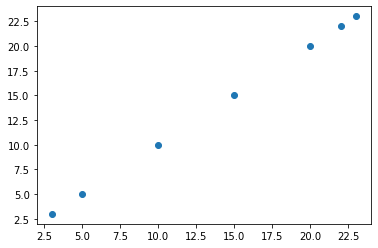

In [62]:
# x-axis values (sleeping hours)
x = sleep_diary['Hours slept']
  
# Y-axis values (stu-dying hours)
y = sleep_diary['Hours slept']
  
# Function to plot scatter 
plt.scatter(x, y) 
  
# function to show the plot 
plt.show() 



## Question 4

Create a bar plot for number of hours of studying last week 


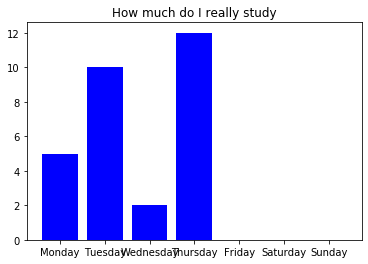

In [63]:

## An accurate bar chart of how much I study. not really though
HoursStudying=sleep_diary["Hours studied"] # gets the hours studied
Days=sleep_diary.index  # gets the days 

plt.bar(Days,HoursStudying,width=.8,color='blue')
plt.title("How much do I really study")
plt.show()


## Part 2
The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. 

The columns are organized as # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals. Use this dataset to answer the questions below.

In [64]:
url='http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/olympics.csv'
df = pd.read_csv(url, index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)
        
df.drop('Totals', inplace=True)

df.head(10)

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
Bahamas (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
Bahrain (BRN),8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


## Question 5 

Explain what the line  "df.drop('Totals', inplace=True)" is doing in above data pre-processing.


In [65]:
# It permanently removes the column Totals from the dataset 

## Question 6

Create a DataFrame for countries that have won no gold medals (winter or summer) but have won a silver medal (in either summer or winter).  How many such countries are there?


In [77]:
url='http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/olympics.csv'
df2 = pd.read_csv(url, index_col=0, skiprows=1)
# fist I obtain the data set like in the original 
for col in df2.columns:
    if col[:2]=='01':
        df2.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df2.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df2.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df2.rename(columns={col:'#'+col[1:]}, inplace=True)

df2.drop('Totals', inplace=True)


# Then have to loop over each row and delete the rows that
# have a gold or less than 1 silver 
for index, row in df2.iterrows():
    if row['Gold']>0 or row['Silver']<1:
        df2.drop(index, inplace=True)

df2

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Bohemia (BOH) [BOH] [Z],3,0,1,3,4,0,0,0,0,0,3,0,1,3,4
Botswana (BOT),9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
Ivory Coast (CIV) [CIV],12,0,1,0,1,0,0,0,0,0,12,0,1,0,1
Cyprus (CYP),9,0,1,0,1,10,0,0,0,0,19,0,1,0,1
Gabon (GAB),9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
Ghana (GHA) [GHA],13,0,1,3,4,1,0,0,0,0,14,0,1,3,4
Guatemala (GUA),13,0,1,0,1,1,0,0,0,0,14,0,1,0,1
Haiti (HAI) [J],14,0,1,1,2,0,0,0,0,0,14,0,1,1,2
Iceland (ISL),19,0,2,2,4,17,0,0,0,0,36,0,2,2,4
Kyrgyzstan (KGZ),5,0,1,2,3,6,0,0,0,0,11,0,1,2,3


## Question 7

Sort the only_silver DataFrame by number of total silvers.
<br>
Then query the DataFrame to determine highest number of silver medals won by a country with no gold medals.
<br>
Then query the DataFrame to determine the country or countries in only_silver that have won the most silver medals.
Hint: check the values for all countries in only_silver.index.

In [78]:
# sorting the silver table by the silvers column
df2=df2.sort_values(by=['Silver'] , ascending=False)
# have to set it equal to the df to make it permanent 
df2

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Namibia (NAM),6,0,4,0,4,0,0,0,0,0,6,0,4,0,4
Malaysia (MAS) [MAS],12,0,3,3,6,0,0,0,0,0,12,0,3,3,6
Puerto Rico (PUR),17,0,2,6,8,6,0,0,0,0,23,0,2,6,8
Moldova (MDA),5,0,2,5,7,6,0,0,0,0,11,0,2,5,7
Philippines (PHI),20,0,2,7,9,4,0,0,0,0,24,0,2,7,9
Vietnam (VIE),14,0,2,0,2,0,0,0,0,0,14,0,2,0,2
Singapore (SIN),15,0,2,2,4,0,0,0,0,0,15,0,2,2,4
Tanzania (TAN) [TAN],12,0,2,0,2,0,0,0,0,0,12,0,2,0,2
Iceland (ISL),19,0,2,2,4,17,0,0,0,0,36,0,2,2,4
Sri Lanka (SRI) [SRI],16,0,2,0,2,0,0,0,0,0,16,0,2,0,2


## Question 8

Add a column to the DataFrame df that contains the value of summer gold medals - winter gold metals.
Sort the DataFrame by this column and determine which country has the smallest value here and which has the largest value. 



In [81]:
arr=[]
# calculate the sdifference for each row 
for index, row in df.iterrows():
    arr.append(row['Gold']-row['Gold.1'])
    # append that difference to an array 
df['strange']= arr
# create a new col called strange with those values of the differences 
df=df.sort_values(by=['strange'] , ascending=False)
# sort by that col 
df

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,strange
United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,880
Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,317
Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,226
China (CHN) [CHN],9,201,146,126,473,10,12,22,19,53,19,213,168,145,526,189
France (FRA) [O] [P] [Z],27,202,223,246,671,22,31,31,47,109,49,233,254,293,780,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9,-2
Canada (CAN),25,59,99,121,279,22,62,56,52,170,47,121,155,173,449,-3
Switzerland (SUI),27,47,73,65,185,22,50,40,48,138,49,97,113,113,323,-3
Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304,-41


## Question 9
Write a function that creates a Series called "Points" which is a weighted value where each gold medal (`Gold.2`) counts for 3 points, silver medals (`Silver.2`) for 2 points, and bronze medals (`Bronze.2`) for 1 point. The function should return only the column (a Series object) which you created, with the country names as indices.

def Points():

## Question 10

How comfortable are you with pandas DataFrames after this homework assignment? Explain what you think you are understanding well and describe anything you would like to understand better.

In [67]:
# Not Comfortable with anything past question 6 onwards we never even spoke about that in class... looping through the sets or
#accessing them in a looping structure 
